In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Shakthi
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Shakthi
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Shakthi V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Shakthi
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Shakthi
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to C:\Users\Sh

True

In [15]:
import nltk
tagged_sentences = nltk.corpus.treebank.tagged_sents()

In [16]:
print(tagged_sentences[2])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))

[('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]
Tagged sentences:  3914
Tagged words: 100676


In [17]:
import numpy as np
sentences, sentence_tags =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))

In [18]:
print(sentences[29])
print(sentence_tags[29])

['Workers' 'described' '``' 'clouds' 'of' 'blue' 'dust' "''" 'that'
 '*T*-1' 'hung' 'over' 'parts' 'of' 'the' 'factory' ',' 'even' 'though'
 'exhaust' 'fans' 'ventilated' 'the' 'area' '.']
['NNS' 'VBD' '``' 'NNS' 'IN' 'JJ' 'NN' "''" 'WDT' '-NONE-' 'VBD' 'IN'
 'NNS' 'IN' 'DT' 'NN' ',' 'RB' 'IN' 'NN' 'NNS' 'VBD' 'DT' 'NN' '.']


In [19]:
from sklearn.model_selection import train_test_split
(train_sentences,  test_sentences, train_tags, test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2)

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer

st = PorterStemmer()
words, tags = set([]), set([])

for s in train_sentences:    
    for w in s:
        words.add(w.lower())

for ts in train_tags:
    for t in ts:
        tags.add(t)

In [21]:
word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0
word2index['-OOV-'] = 1
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0

In [22]:
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)
    
for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

In [23]:
for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])

for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])

In [24]:
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[2875, 2082, 3591, 1957, 827, 6806, 5765, 8889, 8442, 1000, 8791, 1596, 9883, 5007, 1596, 8042, 2638, 8653, 9067, 8001, 8198, 1120, 9883, 1756, 2009, 9265, 4186, 5865, 2875, 4158, 2818, 1202]
[2875, 4961, 2939, 1, 5172, 2939, 1, 1756, 1000, 3791, 3449, 76, 2939, 1756, 1707, 7923, 76, 6899, 8875, 1316, 2875, 1, 1202, 7172]
[17, 42, 10, 21, 21, 21, 21, 28, 42, 2, 37, 42, 30, 37, 42, 39, 38, 40, 5, 40, 21, 21, 30, 5, 4, 17, 42, 30, 17, 35, 42, 8]
[17, 42, 13, 21, 21, 13, 10, 5, 2, 40, 30, 6, 13, 5, 4, 5, 6, 38, 27, 40, 17, 42, 8, 31]


In [25]:
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)

271


In [26]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

In [27]:
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[2875 2082 3591 1957  827 6806 5765 8889 8442 1000 8791 1596 9883 5007
 1596 8042 2638 8653 9067 8001 8198 1120 9883 1756 2009 9265 4186 5865
 2875 4158 2818 1202    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [28]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 271, 128)          1293696   
_________________________________________________________________
bidirectional (Bidirectional (None, 271, 512)          788480    
_________________________________________________________________
time_distributed (TimeDistri (None, 271, 47)           24111     
_________________________________________________________________
activation (Activation)      (None, 271, 47)           0         
Total params: 2,106,287
Trainable params: 2,106,287
Non-trainable params: 0
_________________________________________________________________


In [30]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [31]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [32]:
history = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

Train on 2504 samples, validate on 627 samples
Epoch 1/40
2504/2504 [==============================] - ETA: 0s - loss: 1.2323 - accuracy: 0.8590

C:\Users\Shakthi V\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2504/2504 [==============================] - 107s 43ms/sample - loss: 1.2323 - accuracy: 0.8590 - val_loss: 0.3698 - val_accuracy: 0.9070
Epoch 2/40
2504/2504 [==============================] - 140s 56ms/sample - loss: 0.3338 - accuracy: 0.9063 - val_loss: 0.3238 - val_accuracy: 0.9040
Epoch 3/40
2504/2504 [==============================] - 260s 104ms/sample - loss: 0.3149 - accuracy: 0.9085 - val_loss: 0.3121 - val_accuracy: 0.9156
Epoch 4/40
2504/2504 [==============================] - 336s 134ms/sample - loss: 0.3048 - accuracy: 0.9167 - val_loss: 0.3038 - val_accuracy: 0.9165
Epoch 5/40
2504/2504 [==============================] - 350s 140ms/sample - loss: 0.2960 - accuracy: 0.9171 - val_loss: 0.2952 - val_accuracy: 0.9164
Epoch 6/40
2504/2504 [==============================] - 363s 145ms/sample - loss: 0.2877 - accuracy: 0.9171 - val_loss: 0.2881 - val_accuracy: 0.9168
Epoch 7/40
2504/2504 [==============================] - 361s 144ms/sample - loss: 0.2812 - accuracy: 0.9182 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


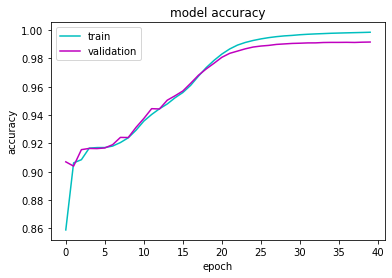

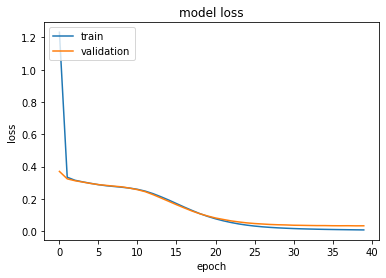

In [33]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.axes().set(facecolor ="white")
plt.plot(history.history['accuracy'],color='c')
plt.plot(history.history['val_accuracy'],color='m')
plt.title('model accuracy').set_color('black')
plt.ylabel('accuracy').set_color('black')
plt.xlabel('epoch').set_color('black')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

plt.axes().set(facecolor ="white")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title('model loss').set_color('black')
plt.ylabel('loss').set_color('black')
plt.xlabel('epoch').set_color('black')
plt.show()

In [34]:
predictions = model.predict(test_sentences_X)

C:\Users\Shakthi V\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [35]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")
print(model.metrics_names)

accuracy: 99.15218949317932
['loss', 'accuracy']


In [36]:
from nltk.tokenize import sent_tokenize, word_tokenize
input_text = "Will he take NLP in next semester?I shall call my friend now. The list has been sent! He must fill it soon."
test_samples = sent_tokenize(input_text)

In [37]:
test_samples = [word_tokenize(x) for x in test_samples]

In [38]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[5581 1081 6700    1 4379 1137    1 6238 6256  799 7658 8039 3138 6169
  1202    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [39]:
predictions = model.predict(test_samples_X)

In [40]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            if index[np.argmax(categorical)] == '-PAD-':
                break
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [41]:
print(logits_to_tokens(predictions, {i: t for t, i in tag2index.items()}))

[['MD', 'PRP', 'VB', 'NN', 'IN', 'JJ', 'JJ', '.', 'PRP', 'MD', 'VB', 'PRP$', 'NN'], ['DT', 'NN', 'VBZ', 'VBN', 'VBN', '.'], ['PRP', 'MD', 'VB', 'PRP', 'RB', '.']]
